# Proyek Analisis Data: [Input Nama Dataset]
- Nama: Gettar Adhi Pinaringan
- Email: mc011d5y2325@student.devacademy.id
- ID Dicoding: mc011d5y2325

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 Bisakah kita memprediksi jumlah sepeda yang akan disewa pada jam-jam tertentu berdasarkan cuaca , suhu, dan apakah itu hari kerja
- Pertanyaan 2 Bisakah kita mengelompokkan pelanggan berdasarkan kebiasaan menggunakan bersepeda mereka seperti Jam berapa yang paling ramai Pengguna sepeda

## Import Semua Packages/Library yang Digunakan

In [ ]:
!pip install pandas
!pip install gdown
!pip install streamlit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import streamlit as st


## Data Wrangling

### Gathering Data

In [ ]:
url = "https://drive.google.com/file/d/1JWDPQz_8Ndu3MD1owAKL_lZ8Fxf8TIBi/view"

# Download the file from Google Drive
# Replace 'data.csv' with the desired local file name
output = 'data.csv'
gdown.download(url=url, output=output, quiet=False, fuzzy=True)

# Read the downloaded file into a pandas DataFrame
data_bicyle = pd.read_csv(output)

# Display the first few rows of the DataFrame
data_bicyle.head()

Downloading...
From: https://drive.google.com/uc?id=1JWDPQz_8Ndu3MD1owAKL_lZ8Fxf8TIBi
To: /content/data.csv
100%|██████████| 1.16M/1.16M [00:00<00:00, 41.3MB/s]


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
url

'https://drive.google.com/file/d/1JWDPQz_8Ndu3MD1owAKL_lZ8Fxf8TIBi/view'

Insight:
- Kode ini digunakan untuk membaca dataset bernama "hour.csv" menggunakan pustaka pandas di Python. Dataset tersebut dimuat ke dalam variabel data_bicycle dengan pemisah berupa koma (,). Setelah data dimuat, fungsi head() digunakan untuk menampilkan 5 baris pertama dari dataset tersebut sebagai cuplikan awal data.


- Dataset ini berisi informasi mengenai penyewaan sepeda berdasarkan jam di berbagai kondisi. Setiap baris mewakili satu entri data yang mencatat jumlah penyewa sepeda pada waktu tertentu, beserta beberapa variabel yang memengaruhi jumlah penyewaan.

  Variabel yang terdapat dalam dataset meliputi:

  - Waktu: Terdiri dari tanggal, tahun, bulan, dan jam yang menunjukkan kapan data dikumpulkan.

  - Kondisi Hari: Menunjukkan apakah hari tersebut adalah hari libur, hari kerja, atau hari tertentu dalam seminggu.

  - Kondisi Cuaca: Mencakup suhu, kelembapan, kecepatan angin, dan kondisi cuaca umum (cerah, berawan, hujan ringan, atau cuaca ekstrem).

  - Jumlah Penyewa: Terbagi menjadi dua kategori, yaitu penyewa kasual (tidak terdaftar) dan penyewa terdaftar, serta jumlah total penyewa (casual + registered).


### Assessing Data

Menilai tabel `data_bicyle`




In [ ]:
data_bicyle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Insight:
- Penjelasan Singkat Secara Menyeluruh:
Kode `data_bicycle.info()` digunakan untuk menampilkan ringkasan struktur dataset.
- Dataset memiliki 17 kolom dan 17.379 baris tanpa missing value

  Terdapat tiga jenis tipe data:
  - int64 (bilangan bulat) → 12 kolom
  - float64 (bilangan desimal) → 4 kolom
  - object (teks) → 1 kolom (dteday)

In [ ]:
data_bicyle.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Insight:
- code `data_bicycle.isna().sum()` digunakan untuk memeriksa jumlah nilai yang hilang
- Hasil menunjukkan bahwa setiap kolom memiliki nilai 0, yang berarti tidak ada nilai kosong di seluruh dataset.

In [ ]:
print("Jumlah duplikasi: ", data_bicyle.duplicated().sum())

Jumlah duplikasi:  0


Insight:
- Kode ini digunakan untuk memeriksa jumlah baris duplikat dalam DataFrame
- Dataset bersih dari duplikasi, sehingga tidak perlu proses pembersihan tambahan terkait data ganda.
  -(Tapi tetap akan kita coba Data Cleaning)


In [ ]:
data_bicyle.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Insight:
- Kode ini memberikan statistik deskriptif dari setiap kolom numerik di DataFrame
- Variasi (std) yang cukup besar di kolom seperti casual dan registered menunjukkan adanya perbedaan signifikan dalam jumlah penyewa sepeda.

### Cleaning Data

In [ ]:
data_bicyle.duplicated().sum()

0

In [ ]:
data_bicyle.drop_duplicates(inplace=True)

In [ ]:
data_bicyle.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Insight:
- Kode dilakukan pengecekan apakah adanya duplikasi lalu kita gunakan `data_bicycle.drop_duplicates(inplace=True)` untuk menghapus data kosong lalu dicek ulang setelah dihapus
- Tidak terdapat duplikasi data tapi masih dilakukan untuk pembelajaran

## Exploratory Data Analysis (EDA)

### Explore `data_bicyle`

In [ ]:
data_bicyle.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
7736,7737,2011-11-23,4,0,11,23,0,3,1,1,0.34,0.3030,0.61,0.3582,4,47,51
15338,15339,2012-10-06,4,1,10,7,0,6,0,1,0.54,0.5152,0.83,0.2985,13,71,84
10518,10519,2012-03-19,1,1,3,9,0,1,1,1,0.50,0.4848,0.72,0.1642,55,276,331
4097,4098,2011-06-24,3,0,6,15,0,5,1,1,0.82,0.7273,0.34,0.3881,69,147,216
9964,9965,2012-02-25,1,1,2,5,0,6,0,2,0.30,0.2727,0.42,0.2985,0,3,3


In [ ]:
data_bicyle.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [ ]:
data_bicyle.instant.is_unique

True

Insight:
- `data_bicycle.sample(5)`: Mengambil 5 sampel acak dari dataset untuk memberikan gambaran umum tentang struktur dan isi dataset.
- `data_bicycle.describe(include="all")`: Menampilkan ringkasan statistik deskriptif dari semua kolom dalam dataset, termasuk kolom numerik dan non-numerik.
- Dataset terdiri dari 17.379 entri dengan berbagai variabel terkait persewaan sepeda. Tidak ada nilai yang hilang (missing values). Data mencakup variabel waktu (tanggal, jam), kondisi cuaca (suhu, kelembapan, kecepatan angin), dan jumlah penyewa. Statistik menunjukkan penyebaran data yang cukup luas, misalnya jumlah penyewa total (cnt) bervariasi dari 1 hingga 977, menunjukkan variasi yang signifikan dalam permintaan sepeda sepanjang waktu.

In [ ]:
data_bicyle.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
}).reset_index()


season instant  cnt                            
         nunique  max min        mean         std
0      1    4242  801   1  111.114569  119.224010
1      2    4409  957   1  208.344069  188.362473
2      3    4496  977   1  236.016237  197.711630
3      4    4232  967   1  198.868856  182.967972

Insight:

- Kode tersebut mengelompokkan data berdasarkan musim (season) dan menghitung jumlah data unik (instant) serta statistik deskriptif pada jumlah penyewa sepeda (cnt) seperti nilai maksimum, minimum, rata-rata, dan standar deviasi
- Hasilnya menunjukkan bahwa musim gugur (season 3) memiliki jumlah penyewa tertinggi dengan maksimum 977 dan rata-rata 236 penyewa, sementara musim semi (season 1) memiliki rata-rata penyewa terendah sebesar 111.

In [ ]:
data_bicyle.groupby(by="mnth").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
}).reset_index()


mnth instant  cnt                            
        nunique  max min        mean         std
0     1    1429  559   1   94.424773   99.907146
1     2    1341  610   1  112.865026  112.486565
2     3    1473  957   1  155.410726  163.543050
3     4    1437  822   1  187.260960  181.137902
4     5    1488  873   1  222.907258  187.721497
5     6    1440  900   1  240.515278  196.038950
6     7    1488  913   1  231.819892  187.483806
7     8    1475  941   1  238.097627  200.444648
8     9    1437  977   1  240.773138  214.609531
9    10    1451  963   1  222.158511  203.477057
10   11    1437  729   1  177.335421  158.973887
11   12    1483  759   1  142.303439  141.080674

Insight:
- Kode tersebut mengelompokkan data berdasarkan bulan (mnth) dan menghitung statistik deskriptif untuk setiap kelompok. Statistik yang dihitung meliputi jumlah data unik (instant), serta nilai maksimum, minimum, rata-rata (mean), dan standar deviasi (std) dari jumlah penyewa sepeda (cnt). Dengan menggunakan reset_index(),
- Hasil agregasi menunjukkan pola penyewaan sepeda berdasarkan bulan (mnth). Bulan dengan rata-rata penyewaan tertinggi adalah September (240.77) diikuti oleh Agustus (238.10) dan Juni (240.52), menunjukkan puncak penyewaan terjadi di akhir musim panas. Sebaliknya, penyewaan terendah terjadi di Januari (94.42), menandakan musim dingin memiliki permintaan yang rendah. Standar deviasi yang tinggi di bulan-bulan seperti September (214.61) menunjukkan adanya variasi besar dalam jumlah penyewaan harian, sedangkan bulan Januari memiliki variasi yang lebih rendah (99.91). Secara keseluruhan, penyewaan cenderung meningkat dari awal tahun hingga musim panas dan menurun kembali menjelang akhir tahun.

<Axes: >

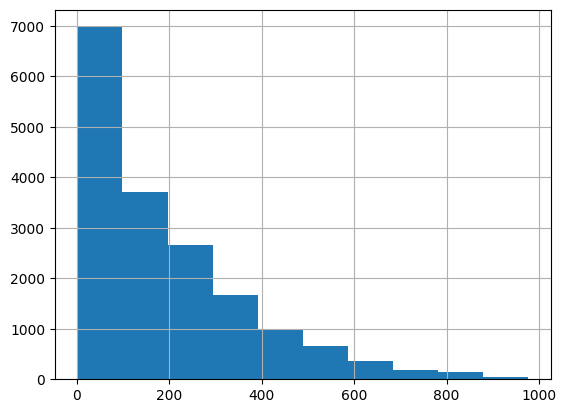

In [ ]:
data_bicyle.cnt.hist()

Insight:
- Kode ini digunakan untuk membuat histogram
- xxxHistogram menunjukkan distribusi jumlah penyewaan sepeda (cnt) yang cenderung right-skewed, di mana sebagian besar penyewaan berada di angka rendah (0–200), sementara jumlah penyewaan yang tinggi jarang terjadi. Ini menunjukkan bahwa penyewaan sepeda lebih sering terjadi dalam jumlah kecil.









## Visualization & Explanatory Analysis



```
# This is formatted as code
```

### Pertanyaan 1: Bisakah kita memprediksi jumlah sepeda yang akan disewa pada jam-jam tertentu berdasarkan cuaca , suhu, dan apakah itu hari kerja

In [ ]:
relevant_columns = ['weathersit', 'temp', 'workingday', 'cnt']
data = data_bicyle[relevant_columns]

<ipython-input-86-3ca828413704>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weather_category', y='cnt', data=data_bicyle, errorbar=None, palette='viridis')


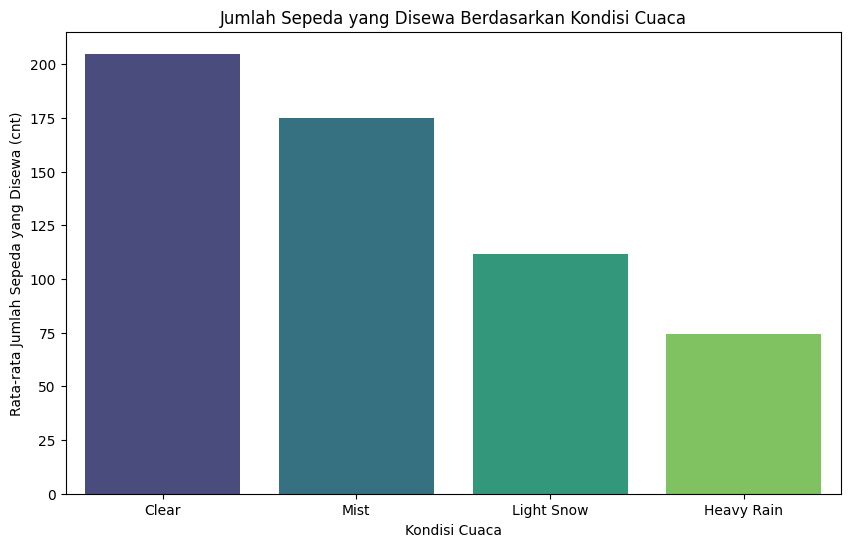

In [ ]:
# Visualisasi 1: Jumlah sepeda yang disewa berdasarkan kondisi cuaca
data_bicyle['Weather_category'] = pd.cut(data_bicyle['weathersit'], bins=4, labels=['Clear','Mist','Light Snow','Heavy Rain'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Weather_category', y='cnt', data=data_bicyle, errorbar=None, palette='viridis')
plt.title('Jumlah Sepeda yang Disewa Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Sepeda yang Disewa (cnt)')
plt.show()



Insight:
- Kode di atas membuat visualisasi jumlah sepeda yang disewa berdasarkan kondisi cuaca menggunakan pandas, seaborn, dan matplotlib. Pertama, dipilih kolom yang relevan (weathersit, temp, workingday, cnt) dari dataset. Kemudian, kolom `weathersit` dikategorikan menjadi empat kelompok (Clear, Mist, Light Snow, Heavy Rain) menggunakan fungsi pd.cut().
- Barplot Menunjukan Jumlah penyewaan sepeda tertinggi terjadi saat cuaca cerah dan menurun seiring memburuknya cuaca, dengan penyewaan terendah saat hujan deras.

<ipython-input-87-c1786475891e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='temp_category', y='cnt', data=data_bicyle, errorbar=None, palette='coolwarm')


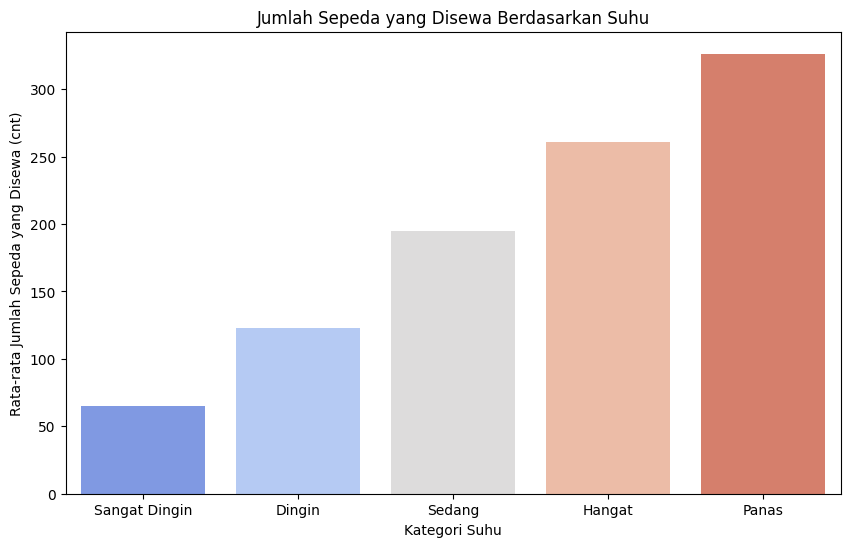

In [ ]:
# Visualisasi 2: Jumlah sepeda yang disewa berdasarkan suhu
# Untuk suhu, kita bisa mengelompokkan data ke dalam beberapa kategori suhu
data_bicyle['temp_category'] = pd.cut(data_bicyle['temp'], bins=5, labels=['Sangat Dingin', 'Dingin', 'Sedang', 'Hangat', 'Panas'])
plt.figure(figsize=(10, 6))
sns.barplot(x='temp_category', y='cnt', data=data_bicyle, errorbar=None, palette='coolwarm')
plt.title('Jumlah Sepeda yang Disewa Berdasarkan Suhu')
plt.xlabel('Kategori Suhu')
plt.ylabel('Rata-rata Jumlah Sepeda yang Disewa (cnt)')
plt.show()

Insight:
- Kode ini mengelompokkan suhu menjadi lima kategori ('Sangat Dingin' hingga 'Panas') menggunakan `pd.cut`, lalu membuat grafik batang (barplot) untuk menampilkan rata-rata jumlah sepeda yang disewa di setiap kategori suhu.
- Grafik menunjukkan bahwa jumlah sepeda yang disewa meningkat seiring dengan kenaikan suhu. Kategori "Panas" memiliki rata-rata penyewaan tertinggi, sementara "Sangat Dingin" memiliki penyewaan terendah. Hal ini menunjukkan bahwa cuaca yang lebih hangat mendorong lebih banyak orang untuk menyewa sepeda.

<ipython-input-88-512b3d66c73f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday', y='cnt', data=data_bicyle, errorbar=None, palette='gist_ncar')


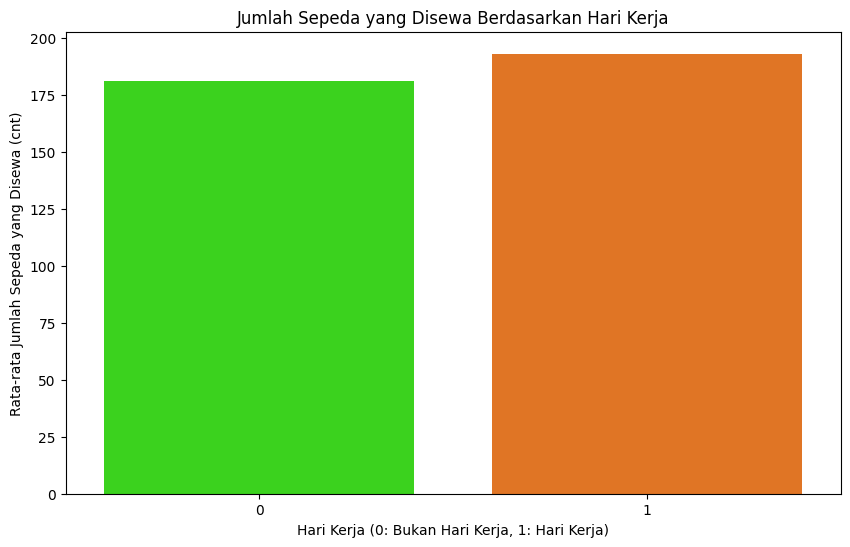

In [ ]:
# Visualisasi 3: Jumlah sepeda yang disewa berdasarkan hari kerja
plt.figure(figsize=(10, 6))
sns.barplot(x='workingday', y='cnt', data=data_bicyle, errorbar=None, palette='gist_ncar')
plt.title('Jumlah Sepeda yang Disewa Berdasarkan Hari Kerja')
plt.xlabel('Hari Kerja (0: Bukan Hari Kerja, 1: Hari Kerja)')
plt.ylabel('Rata-rata Jumlah Sepeda yang Disewa (cnt)')
plt.show()

Insight:
- Kode ini membuat visualisasi jumlah sepeda yang disewa berdasarkan status hari kerja. Variabel` 'workingday' `digunakan sebagai sumbu-x (0 untuk bukan hari kerja, 1 untuk hari kerja), dan `'cnt'` menunjukkan jumlah sepeda yang disewa.
- Grafik menunjukkan bahwa rata-rata jumlah sepeda yang disewa pada hari kerja  sedikit lebih tinggi dibandingkan dengan bukan hari kerja . Ini menunjukkan bahwa permintaan penyewaan sepeda Tidak terpengaruh pada hari Libur Maupun Hari Kerja, Hanya sedikit peningkatan selama hari kerja.

### Pertanyaan 2: Bisakah kita mengelompokkan pelanggan berdasarkan kebiasaan menggunakan bersepeda mereka seperti Jam berapa yang paling ramai Pengguna sepeda

In [ ]:
# 1. Hitung rata-rata penyewaan sepeda per jam
avg_cnt_per_hour = data_bicyle.groupby('hr')['cnt'].mean().reset_index()

# 2. Tentukan kategori berdasarkan persentil
# - Jam Sibuk: Penyewaan di atas persentil 75%
# - Jam Sepi: Penyewaan di bawah persentil 25%
# - Jam Menengah: Penyewaan antara persentil 25% dan 75%
percentile_25 = avg_cnt_per_hour['cnt'].quantile(0.25)
percentile_75 = avg_cnt_per_hour['cnt'].quantile(0.75)

# Fungsi untuk mengkategorikan jam
def categorize_hour(cnt):
    if cnt >= percentile_75:
        return 'Jam Sibuk'
    elif cnt <= percentile_25:
        return 'Jam Sepi'
    else:
        return 'Jam Menengah'

# Tambahkan kolom kategori ke DataFrame
avg_cnt_per_hour['kategori_jam'] = avg_cnt_per_hour['cnt'].apply(categorize_hour)

Insight:
- Kode di atas menganalisis rata-rata penyewaan sepeda per jam dari DataFrame data_bicyle. Pertama, kode menghitung rata-rata penyewaan (`cnt`) untuk setiap jam (`hr`) menggunakan groupby. Selanjutnya, ditentukan dua nilai persentil (`25% dan 75%`) untuk membagi data menjadi tiga kategori: "Jam Sibuk" (di atas persentil 75%), "Jam Sepi" (di bawah persentil 25%), dan "Jam Menengah" (di antara kedua persentil tersebut)


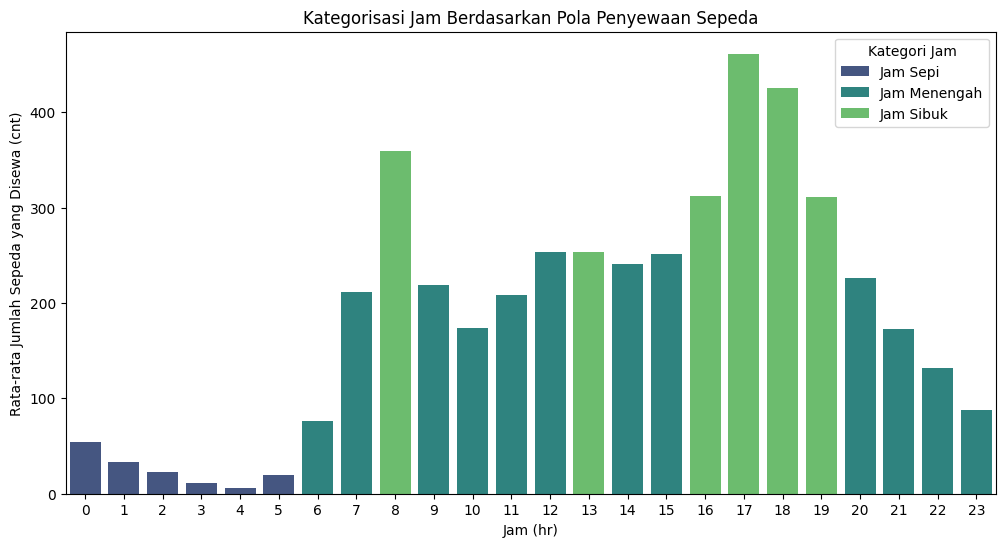

    hr         cnt  kategori_jam
0    0   53.898072      Jam Sepi
1    1   33.375691      Jam Sepi
2    2   22.869930      Jam Sepi
3    3   11.727403      Jam Sepi
4    4    6.352941      Jam Sepi
5    5   19.889819      Jam Sepi
6    6   76.044138  Jam Menengah
7    7  212.064649  Jam Menengah
8    8  359.011004     Jam Sibuk
9    9  219.309491  Jam Menengah
10  10  173.668501  Jam Menengah
11  11  208.143054  Jam Menengah
12  12  253.315934  Jam Menengah
13  13  253.661180     Jam Sibuk
14  14  240.949246  Jam Menengah
15  15  251.233196  Jam Menengah
16  16  311.983562     Jam Sibuk
17  17  461.452055     Jam Sibuk
18  18  425.510989     Jam Sibuk
19  19  311.523352     Jam Sibuk
20  20  226.030220  Jam Menengah
21  21  172.314560  Jam Menengah
22  22  131.335165  Jam Menengah
23  23   87.831044  Jam Menengah


In [ ]:
# 3. Visualisasi hasil kategorisasi
plt.figure(figsize=(12, 6))
sns.barplot(x='hr', y='cnt', hue='kategori_jam', data=avg_cnt_per_hour, palette='viridis')
plt.title('Kategorisasi Jam Berdasarkan Pola Penyewaan Sepeda')
plt.xlabel('Jam (hr)')
plt.ylabel('Rata-rata Jumlah Sepeda yang Disewa (cnt)')
plt.legend(title='Kategori Jam')
plt.show()

# 4. Tampilkan tabel hasil kategorisasi
print(avg_cnt_per_hour)

Insight:
- Kode ini membuat visualisasi dan tabel yang menunjukkan kategori jam berdasarkan rata-rata penyewaan sepeda. Grafik batang menampilkan jam di sumbu-x, rata-rata penyewaan di sumbu-y, dan kategori jam (Jam Sibuk, Jam Menengah, Jam Sepi) ditampilkan dengan warna berbeda. Tabel mencetak hasil kategorisasi, membantu memahami pola penyewaan sepanjang hari.
- Grafik menunjukkan pola penyewaan sepeda berdasarkan jam. Penyewaan terbanyak (Jam Sibuk) terjadi pada pukul 08:00 dan 17:00-18:00, kemungkinan terkait jam berangkat dan pulang kerja. Jam Sepi terjadi pada dini hari hingga subuh (00:00-05:00) ketika aktivitas rendah. Sementara itu, Jam Menengah mencakup sebagian besar waktu di luar jam sibuk, menunjukkan aktivitas penyewaan yang moderat sepanjang hari.

##Analisis Lanjutan (Opsional)

### Analisis RFM


In [ ]:
# Konversi kolom tanggal ke format datetime
data_bicycle['dteday'] = pd.to_datetime(data_bicycle['dteday'])

# Hitung RFM (Recency, Frequency, Monetary)
rfm_df = data_bicycle.groupby('dteday').agg({
    'instant': 'count',  # Frequency (jumlah hari dengan penyewaan)
    'cnt': 'sum'  # Monetary (total penyewaan sepeda)
}).reset_index()

# Hitung Recency
rfm_df['recency'] = (data_bicycle['dteday'].max() - rfm_df['dteday']).dt.days

# Ubah nama kolom
rfm_df.rename(columns={
    'instant': 'frequency',
    'cnt': 'monetary'
}, inplace=True)


Insight:
- Kode di atas membaca dataset `"hour.csv"` dan mengonversi kolom `'dteday'` ke format datetime. Kemudian, kode menghitung metrik RFM (Recency, Frequency, Monetary) dengan mengelompokkan data berdasarkan tanggal. Frequency dihitung sebagai jumlah entri penyewaan per hari, sedangkan Monetary dihitung sebagai total sepeda yang disewa. Recency dihitung sebagai selisih hari antara tanggal terakhir dalam dataset dan setiap tanggal penyewaan.

In [ ]:
# Beri skor RFM (skala 1-5)
# Recency: Semakin kecil nilai, semakin baik
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['r_rank_norm'] = (rfm_df['r_rank'] / rfm_df['r_rank'].max()) * 100

# Frequency: Semakin besar nilai, semakin baik
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['f_rank_norm'] = (rfm_df['f_rank'] / rfm_df['f_rank'].max()) * 100

# Monetary: Semakin besar nilai, semakin baik
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)
rfm_df['m_rank_norm'] = (rfm_df['m_rank'] / rfm_df['m_rank'].max()) * 100



Insight:
- Kode di atas menghitung skor RFM (Recency, Frequency, Monetary) dalam skala 1-5 dengan memberikan peringkat dan normalisasi untuk setiap metrik. Recency diurutkan secara menurun (semakin baru penyewaan, semakin baik), sedangkan Frequency dan Monetary diurutkan secara menaik (semakin sering dan semakin besar penyewaan, semakin baik). Setiap peringkat kemudian dinormalisasi ke skala 0-100 untuk memudahkan analisis dan segmentasi pelanggan berdasarkan pola penyewaan sepeda.

In [ ]:
# Hitung RFM Score
rfm_df['RFM_score'] = (0.15 * rfm_df['r_rank_norm'] + 0.28 * rfm_df['f_rank_norm'] + 0.57 * rfm_df['m_rank_norm']) * 0.05
rfm_df = rfm_df.round(2)

# Segmentasi berdasarkan skor RFM
rfm_df['customer_segment'] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top days", np.where(
        rfm_df['RFM_score'] > 4, "High activity days", np.where(
            rfm_df['RFM_score'] > 3, "Medium activity days", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low activity days', 'Inactive days'))))

Insight:
- Kode di atas menghitung RFM Score dengan memberikan bobot pada setiap komponen: Recency (15%), Frequency (28%), dan Monetary (57%), lalu mengalikannya dengan faktor 0.05 untuk menyesuaikan skala. Setelah skor dihitung dan dibulatkan menjadi dua desimal, dilakukan segmentasi berdasarkan skor tersebut ke dalam lima kategori

<ipython-input-94-8342d54af1d1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


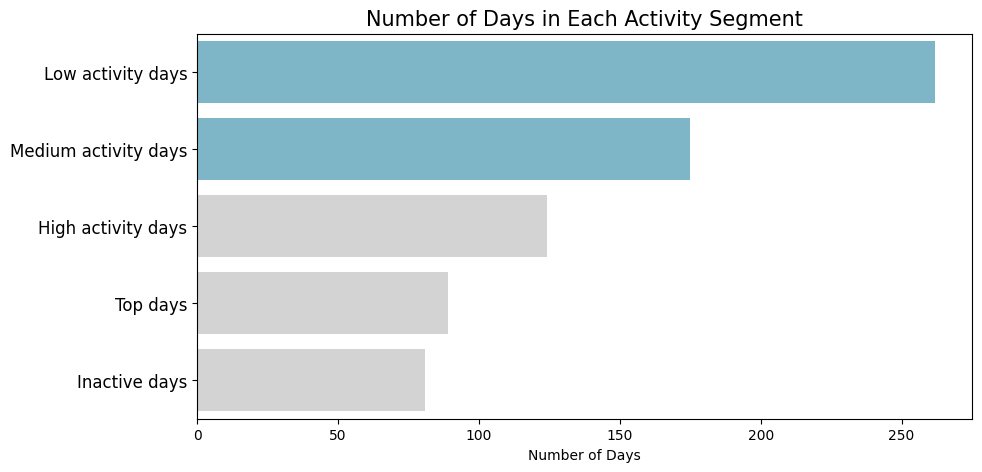

       dteday  frequency  monetary  recency  r_rank  r_rank_norm  f_rank  \
0  2011-01-01         24       985      730     1.0         0.14   404.0   
1  2011-01-02         23       801      729     2.0         0.27    45.5   
2  2011-01-03         22      1349      728     3.0         0.41    11.5   
3  2011-01-04         23      1562      727     4.0         0.55    45.5   
4  2011-01-05         23      1600      726     5.0         0.68    45.5   
5  2011-01-06         23      1606      725     6.0         0.82    45.5   
6  2011-01-07         23      1510      724     7.0         0.96    45.5   
7  2011-01-08         24       959      723     8.0         1.09   404.0   
8  2011-01-09         24       822      722     9.0         1.23   404.0   
9  2011-01-10         24      1321      721    10.0         1.37   404.0   
10 2011-01-11         22      1263      720    11.0         1.50    11.5   
11 2011-01-12         22      1162      719    12.0         1.64    11.5   
12 2011-01-1

In [ ]:
# Visualisasi segmentasi
segment_counts = rfm_df['customer_segment'].value_counts().reset_index()
segment_counts.columns = ['customer_segment', 'count']

plt.figure(figsize=(10, 5))
colors = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x='count',
    y='customer_segment',
    data=segment_counts.sort_values(by='count', ascending=False),
    palette=colors
)
plt.title("Number of Days in Each Activity Segment", fontsize=15)
plt.ylabel(None)
plt.xlabel("Number of Days")
plt.tick_params(axis='y', labelsize=12)
plt.show()

# Tampilkan hasil RFM
print(rfm_df.head(20))


Insight:
- Kode tersebut membuat visualisasi segmentasi RFM dengan menampilkan jumlah hari dalam setiap segmen aktivitas menggunakan barplot horizontal Data dihitung dari kolom `customer_segment` pada DataFrame `rfm_df`, kemudian dibuat grafik menggunakan `sns.barplot()` dengan warna khusus: biru muda untuk segmen aktivitas tinggi dan abu-abu untuk segmen lainnya. Grafik ini membantu memahami distribusi hari berdasarkan tingkat aktivitas penyewaan sepeda. Selain itu, kode juga menampilkan 20 baris pertama dari hasil perhitungan RFM untuk melihat detail skor dan kategori masing-masing hari.
- Grafik menunjukkan distribusi jumlah hari dalam setiap segmen aktivitas berdasarkan skor RFM. "Low activity days" memiliki jumlah hari terbanyak, menunjukkan bahwa mayoritas hari memiliki tingkat penyewaan sepeda yang rendah. "Medium activity days" berada di posisi kedua, mengindikasikan adanya sejumlah hari dengan aktivitas penyewaan sedang. "High activity days" dan "Top days" memiliki jumlah yang lebih sedikit, mencerminkan hari-hari dengan aktivitas penyewaan tinggi yang jarang terjadi. "Inactive days" memiliki jumlah paling rendah, menunjukkan hari-hari dengan hampir tidak ada aktivitas penyewaan. Ini mengindikasikan pola penyewaan sepeda yang sebagian besar terjadi pada tingkat rendah hingga sedang.

### Analisis Cluster

In [ ]:
# Binning pada kolom 'temp'
bins_temp = [0, 0.25, 0.5, 0.75, 1.0]
labels_temp = ['Low', 'Medium', 'High', 'Very High']

data_bicyle['temp_bin'] = pd.cut(data_bicyle['temp'], bins=bins_temp, labels=labels_temp)

# Binning pada kolom 'cnt'
bins_cnt = [0, 100, 200, 1000]
labels_cnt = ['Low', 'Medium', 'High']

data_bicyle['cnt_bin'] = pd.cut(data_bicyle['cnt'], bins=bins_cnt, labels=labels_cnt)


Insight:
- Kode di atas melakukan binning (pengelompokan) pada dua kolom dalam dataset `data_bicycle`. Pada kolom 'temp' (suhu), nilai dibagi menjadi empat kategori: 'Low', 'Medium', 'High', dan 'Very High' berdasarkan rentang nilai antara 0 hingga 1. Selanjutnya, pada kolom 'cnt' (jumlah penyewaan), nilai dibagi menjadi tiga kategori: 'Low' (0-100), 'Medium' (101-200), dan 'High' (201-1000). Binning ini mempermudah analisis pola penyewaan sepeda berdasarkan tingkat suhu dan jumlah penyewaan.

<ipython-input-96-26640672d589>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='temp_bin', data=data_bicyle, order=labels_temp, palette='viridis', ax=axes[0])


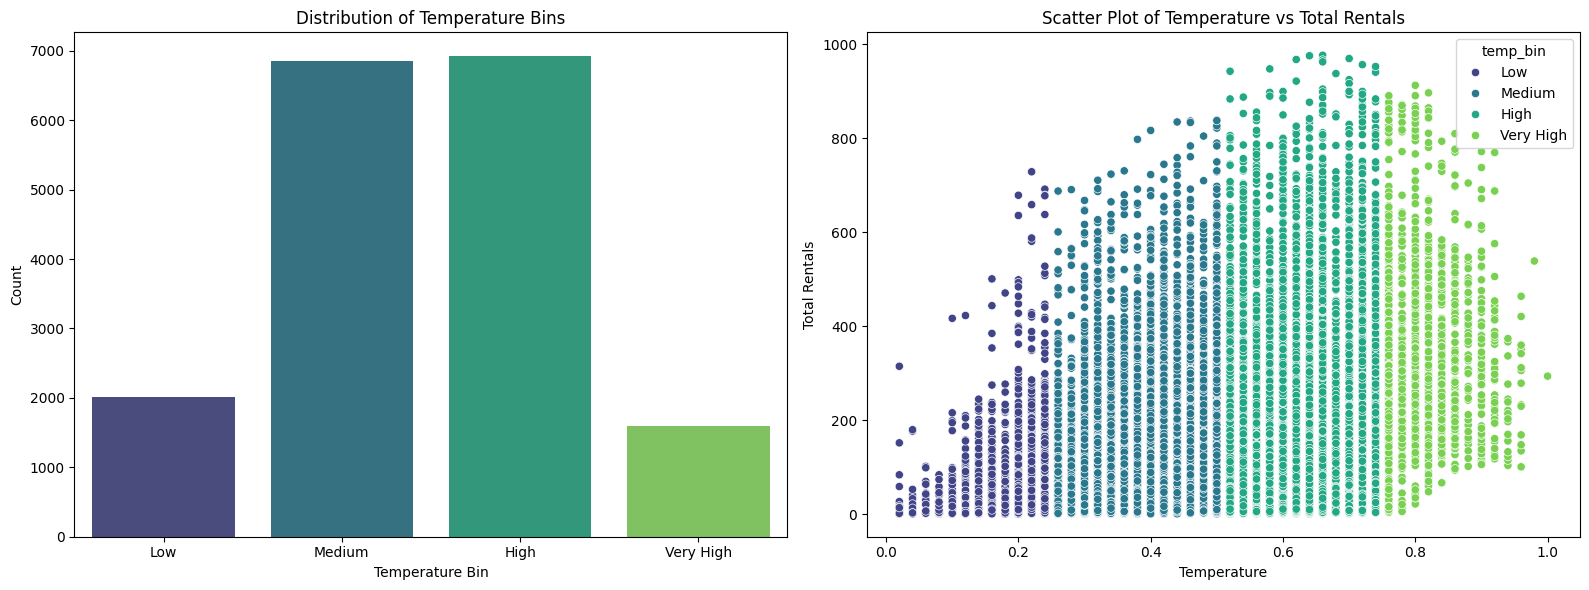

In [ ]:
# Visualisasi binning pada 'temp' dan scatterplot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart untuk temp_bin
sns.countplot(x='temp_bin', data=data_bicyle, order=labels_temp, palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Temperature Bins')
axes[0].set_xlabel('Temperature Bin')
axes[0].set_ylabel('Count')

# Scatter plot temp vs cnt
sns.scatterplot(x='temp', y='cnt', data=data_bicyle, hue='temp_bin', palette='viridis', ax=axes[1])
axes[1].set_title('Scatter Plot of Temperature vs Total Rentals')
axes[1].set_xlabel('Temperature')
axes[1].set_ylabel('Total Rentals')

plt.tight_layout()
plt.show()

Insight:
- Distribusi Binning Suhu (Temperature Bins) (kiri):
Mayoritas data berada di kategori Medium dan High, yang menunjukkan bahwa sebagian besar suhu berkisar antara 0.25 hingga 0.75. Kategori Low dan Very High memiliki jumlah pengamatan yang lebih sedikit, menunjukkan bahwa suhu ekstrem (sangat rendah atau sangat tinggi) jarang terjadi.

- Scatter Plot Suhu vs Total Penyewaan (Temperature vs Total Rentals) (kanan):
Terdapat hubungan positif antara suhu dan jumlah penyewaan sepeda hingga titik tertentu. Penyewaan cenderung meningkat seiring kenaikan suhu hingga kategori High, namun mulai menurun pada suhu yang sangat tinggi (Very High). Ini menunjukkan bahwa cuaca yang terlalu panas mungkin mengurangi aktivitas penyewaan.


<ipython-input-97-042e4fc8ce24>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cnt_bin', data=data_bicyle, order=labels_cnt, palette='magma', ax=axes[0])


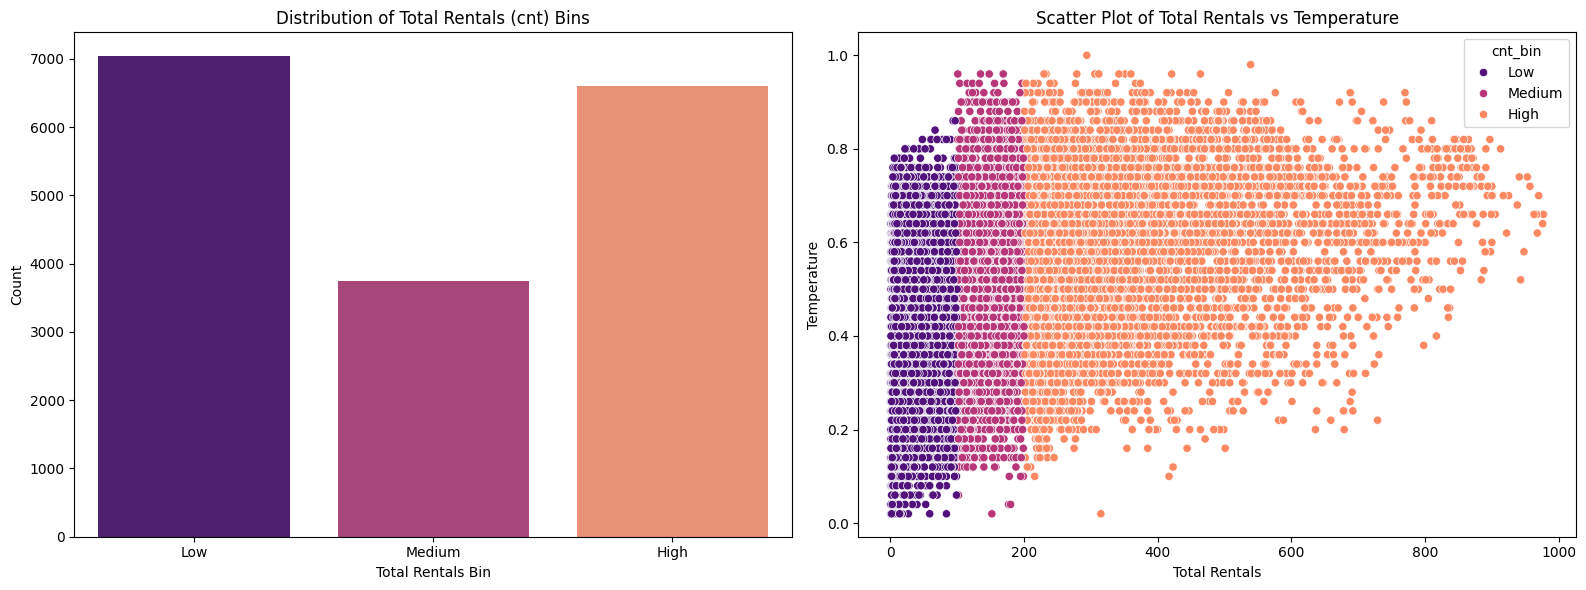

In [ ]:
# Visualisasi binning pada 'cnt' dan scatterplot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart untuk cnt_bin
sns.countplot(x='cnt_bin', data=data_bicyle, order=labels_cnt, palette='magma', ax=axes[0])
axes[0].set_title('Distribution of Total Rentals (cnt) Bins')
axes[0].set_xlabel('Total Rentals Bin')
axes[0].set_ylabel('Count')

# Scatter plot cnt vs temp
sns.scatterplot(x='cnt', y='temp', data=data_bicyle, hue='cnt_bin', palette='magma', ax=axes[1])
axes[1].set_title('Scatter Plot of Total Rentals vs Temperature')
axes[1].set_xlabel('Total Rentals')
axes[1].set_ylabel('Temperature')

plt.tight_layout()
plt.show()


Insight:

- Distribusi Total Rentals (cnt) Bins (Kiri):
Mayoritas data berada dalam kategori Low dan High, menunjukkan bahwa sebagian besar hari memiliki jumlah penyewaan yang rendah atau tinggi, sedangkan kategori Medium memiliki jumlah yang lebih sedikit.

- Scatter Plot Total Rentals vs Temperature (Kanan):
Terlihat bahwa penyewaan sepeda cenderung meningkat seiring dengan naiknya suhu, di mana kategori High (ditandai dengan warna oranye) mendominasi pada suhu yang lebih tinggi. Sebaliknya, kategori Low

## Conclusion

- Conclution pertanyaan 1
- Berdasarkan interpretasi sebelumnya, terdapat hubungan positif antara suhu (temperature) dan jumlah penyewaan sepeda (total rentals)—di mana suhu yang lebih tinggi cenderung berasosiasi dengan jumlah penyewaan yang lebih banyak. Dengan menggunakan variabel cuaca, suhu, dan status hari kerja (workday), kita dapat membangun model prediktif seperti regresi linear atau model berbasis pohon keputusan (Random Forest, Gradient Boosting) untuk memperkirakan jumlah penyewaan sepeda pada jam-jam tertentu. Faktor cuaca dan suhu akan memengaruhi perilaku penyewaan, sementara status hari kerja dapat membedakan pola penggunaan antara hari kerja (yang cenderung memiliki pola rutin) dan akhir pekan (dengan pola yang lebih bervariasi).
- Conclution pertanyaan 2
- Berdasarkan visualisasi yang disajikan, kita dapat mengelompokkan pelanggan berdasarkan kebiasaan menggunakan sepeda mereka. Pola penyewaan menunjukkan adanya dua periode puncak (jam sibuk) dalam sehari, yaitu pada pagi hari sekitar pukul 07:00 - 09:00 dan sore hari sekitar pukul 16:00 - 18:00. Peningkatan signifikan ini kemungkinan besar disebabkan oleh aktivitas perjalanan ke dan dari tempat kerja atau kegiatan rutin harian lainnya. Sebaliknya, pada dini hari (00:00 - 05:00), jumlah penyewaan sepeda sangat rendah, menunjukkan bahwa waktu tersebut merupakan periode sepi dengan aktivitas minimal. Selain itu, suhu juga memengaruhi pola penyewaan. Pada suhu yang sedang hingga tinggi (Medium hingga High), jumlah penyewaan sepeda meningkat secara signifikan, menunjukkan bahwa kondisi cuaca yang nyaman mendorong lebih banyak pelanggan untuk menyewa sepeda. Namun, pada suhu yang sangat tinggi (Very High), jumlah penyewaan cenderung menurun, kemungkinan karena cuaca yang terlalu panas membuat pelanggan enggan menggunakan sepeda.